In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_bcd_finetune(csv_files):
    """
    Plots Average BCD_2D vs Average DICE for Threshold Type: BCD
    for finetune setups: pretrain_synth (yellow shades) and cracks_experts (green shades).
    
    Parameters:
    csv_files (list): List of CSV file paths.
    """
    colors = {
        "pretrain_synth": ["goldenrod", "khaki", "darkorange", "gold"],
        "cracks experts": ["darkgreen", "lightgreen", "forestgreen", "mediumseagreen"]
    }
    
    data_frames = []
    
    for file in csv_files:
        df = pd.read_csv(file)
        df["Finetune"] = df["Finetune"].str.strip()
        data_frames.append(df)
    
    combined_df = pd.concat(data_frames, ignore_index=True)
    
    # Filter data for Threshold Type: BCD and the relevant finetune setups
    filtered_df = combined_df[combined_df["Threshold Type"] == "BCD"]
    
    # Normalize BCD_2D and DICE across all models
    bcd_2d_min, bcd_2d_max = filtered_df["Average BCD_2D"].min(), filtered_df["Average BCD_2D"].max()
    dice_min, dice_max = filtered_df["Average DICE"].min(), filtered_df["Average DICE"].max()
    
    filtered_df["Normalized BCD_2D"] = (filtered_df["Average BCD_2D"] - bcd_2d_min) / (bcd_2d_max - bcd_2d_min)
    filtered_df["Normalized DICE"] = (filtered_df["Average DICE"] - dice_min) / (dice_max - dice_min)
    
    plt.figure(figsize=(8, 6))
    
    finetune_types = ["pretrain_synth", "cracks experts"]
    color_indices = {"pretrain_synth": 0, "cracks experts": 0}
    
    models = filtered_df["Model"].unique()
    
    for model in models:
        for finetune in finetune_types:
            df_subset = filtered_df[(filtered_df["Finetune"] == finetune) & (filtered_df["Model"] == model)]
            if not df_subset.empty:
                color = colors[finetune][color_indices[finetune] % len(colors[finetune])]
                plt.scatter(df_subset["Normalized BCD_2D"], df_subset["Normalized DICE"], label=f"{model} ({finetune})", marker='o', alpha=0.7, color=color)
                color_indices[finetune] += 1
    
    plt.xlabel("Normalized Average BCD_2D")
    plt.ylabel("Normalized Average DICE")
    plt.title("Normalized BCD_2D vs DICE for Threshold Type: BCD\n(Finetune: pretrain_synth & cracks_experts)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# plot_bcd_finetune(["path_to_model1.csv", "path_to_model2.csv"])


In [ ]:
plot_bcd_finetune(["/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_deeplab.csv", "/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_segformer.csv"])

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_bcd_finetune1(csv_files):
    """
    Plots Average BCD_2D vs Average DICE for Threshold Type: BCD
    for finetune setups: pretrain_synth (yellow shades) and cracks_experts (green shades).
    
    Parameters:
    csv_files (list): List of CSV file paths.
    """
    colors = {
        "pretrain_synth": ["goldenrod", "khaki", "darkorange", "gold"],
        "cracks experts": ["darkgreen", "lightgreen", "forestgreen", "mediumseagreen"]
    }
    
    data_frames = []
    
    for file in csv_files:
        df = pd.read_csv(file)
        df["Finetune"] = df["Finetune"].str.strip()
        data_frames.append(df)
    
    combined_df = pd.concat(data_frames, ignore_index=True)
    
    # Filter data for Threshold Type: BCD and relevant finetune setups
    filtered_df = combined_df[(combined_df["Threshold Type"] == "BCD") & (combined_df["Finetune"].isin(["pretrain_synth", "cracks experts"]))].copy()
    
    # Normalize BCD_2D and DICE within the filtered dataset
    bcd_2d_min, bcd_2d_max = filtered_df["Average BCD_2D"].min(), filtered_df["Average BCD_2D"].max()
    dice_min, dice_max = filtered_df["Average DICE"].min(), filtered_df["Average DICE"].max()
    
    if bcd_2d_min != bcd_2d_max:
        filtered_df["Normalized BCD_2D"] = (filtered_df["Average BCD_2D"] - bcd_2d_min) / (bcd_2d_max - bcd_2d_min)
    else:
        filtered_df["Normalized BCD_2D"] = 0.5  # Assign middle value if no variation
    
    if dice_min != dice_max:
        filtered_df["Normalized DICE"] = (filtered_df["Average DICE"] - dice_min) / (dice_max - dice_min)
    else:
        filtered_df["Normalized DICE"] = 0.5  # Assign middle value if no variation
    
    plt.figure(figsize=(8, 6))
    
    finetune_types = ["pretrain_synth", "cracks experts"]
    color_indices = {"pretrain_synth": 0, "cracks experts": 0}
    
    models = filtered_df["Model"].unique()
    
    for model in models:
        for finetune in finetune_types:
            df_subset = filtered_df[(filtered_df["Finetune"] == finetune) & (filtered_df["Model"] == model)]
            
            if not df_subset.empty:
                color = colors[finetune][color_indices[finetune] % len(colors[finetune])]
                plt.scatter(df_subset["Normalized BCD_2D"], df_subset["Normalized DICE"], label=f"{model} ({finetune})", marker='o', alpha=0.7, color=color)
                color_indices[finetune] += 1
    
    plt.xlabel("Normalized Average BCD_2D")
    plt.ylabel("Normalized Average DICE")
    plt.title("Normalized BCD_2D vs DICE for Threshold Type: BCD\n(Finetune: pretrain_synth & cracks_experts)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# plot_bcd_finetune(["path_to_model1.csv", "path_to_model2.csv"])


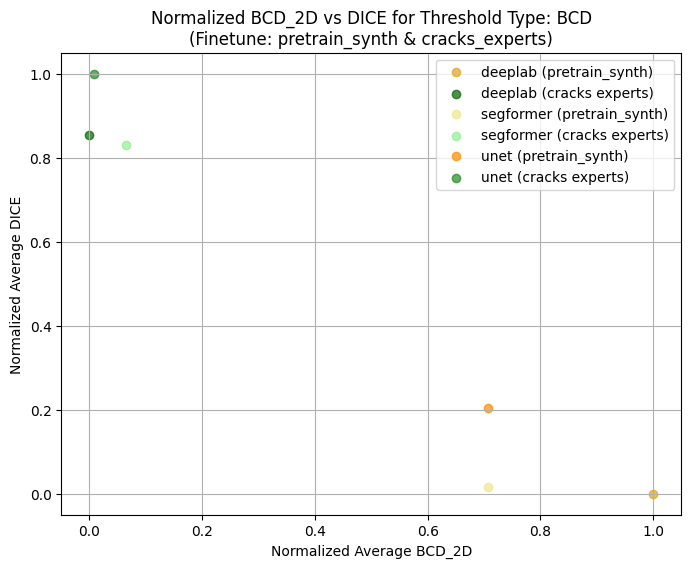

In [5]:
plot_bcd_finetune1(["/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_deeplab.csv", "/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_segformer.csv", "/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_unet.csv"])

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_bcd_finetune2(csv_files, finetune_setups):
    """
    Plots Average BCD_2D vs Average DICE for Threshold Type: BCD
    for specified finetune setups, using different color shades for each.
    
    Parameters:
    csv_files (list): List of CSV file paths.
    finetune_setups (dict): Dictionary where keys are finetune names and values are color shades.
    """
    data_frames = []
    
    for file in csv_files:
        df = pd.read_csv(file)
        df["Finetune"] = df["Finetune"].str.strip()
        data_frames.append(df)
    
    combined_df = pd.concat(data_frames, ignore_index=True)
    
    # Filter data for Threshold Type: BCD and selected finetune setups
    selected_finetunes = list(finetune_setups.keys())
    filtered_df = combined_df[(combined_df["Threshold Type"] == "BCD") & (combined_df["Finetune"].isin(selected_finetunes))].copy()
    
    # Normalize BCD_2D and DICE within the filtered dataset
    bcd_2d_min, bcd_2d_max = filtered_df["Average BCD_2D"].min(), filtered_df["Average BCD_2D"].max()
    dice_min, dice_max = filtered_df["Average DICE"].min(), filtered_df["Average DICE"].max()
    
    if bcd_2d_min != bcd_2d_max:
        filtered_df["Normalized BCD_2D"] = (filtered_df["Average BCD_2D"] - bcd_2d_min) / (bcd_2d_max - bcd_2d_min)
    else:
        filtered_df["Normalized BCD_2D"] = 0.5  # Assign middle value if no variation
    
    if dice_min != dice_max:
        filtered_df["Normalized DICE"] = (filtered_df["Average DICE"] - dice_min) / (dice_max - dice_min)
    else:
        filtered_df["Normalized DICE"] = 0.5  # Assign middle value if no variation
    
    plt.figure(figsize=(8, 6))
    
    color_indices = {finetune: 0 for finetune in selected_finetunes}
    
    models = filtered_df["Model"].unique()
    
    for model in models:
        for finetune in selected_finetunes:
            df_subset = filtered_df[(filtered_df["Finetune"] == finetune) & (filtered_df["Model"] == model)]
            
            if not df_subset.empty:
                color = finetune_setups[finetune][color_indices[finetune] % len(finetune_setups[finetune])]
                plt.scatter(df_subset["Normalized BCD_2D"], df_subset["Normalized DICE"], label=f"{model} ({finetune})", marker='o', alpha=0.7, color=color)
                color_indices[finetune] += 1
    
    plt.xlabel("Normalized Average BCD_2D")
    plt.ylabel("Normalized Average DICE")
    plt.title("Normalized BCD_2D vs DICE for Threshold Type: BCD\n(Finetune: Various Setups)")
    plt.legend()
    plt.grid(True)
    plt.show()




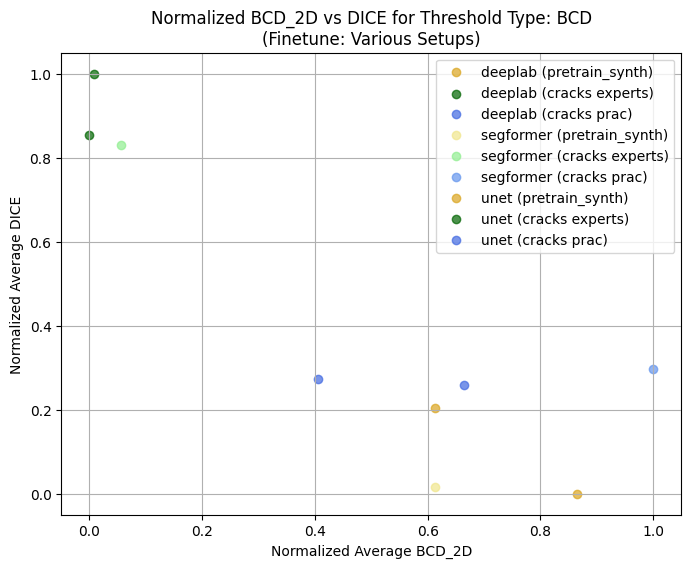

In [12]:
# Example usage:
finetune_colors = {
    "pretrain_synth": ["goldenrod", "khaki"],
    "cracks experts": ["darkgreen", "lightgreen"],
    "cracks prac": ["royalblue", "cornflowerblue"]
}
plot_bcd_finetune2(["/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_deeplab.csv", "/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_segformer.csv", "/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_unet.csv"], finetune_colors)


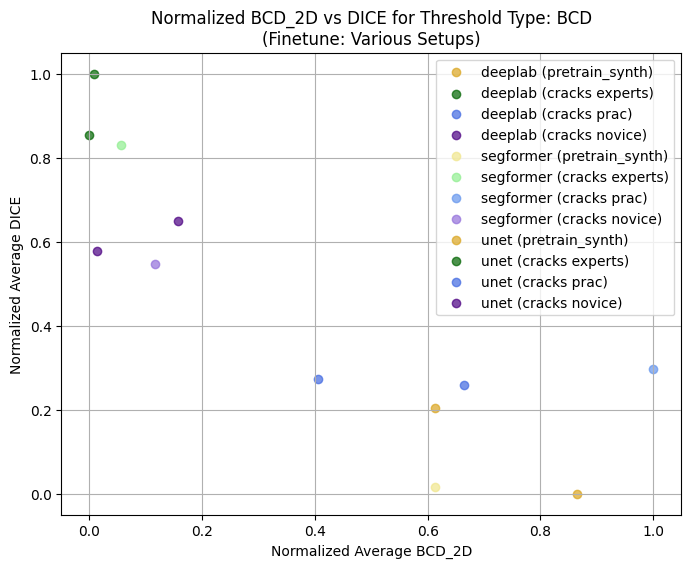

In [13]:
# Example usage:
finetune_colors = {
    "pretrain_synth": ["goldenrod", "khaki"],
    "cracks experts": ["darkgreen", "lightgreen"],
    "cracks prac": ["royalblue", "cornflowerblue"],
    "cracks novice": ["indigo", "mediumpurple"]
}
plot_bcd_finetune2(["/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_deeplab.csv", "/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_segformer.csv", "/home/prithwijit/Cracks/Prithwijit_cracks/metrics/cracks/result_csv/output_cracks_testing_unet.csv"], finetune_colors)
